# Predicting Vehicle Prices Using Regression Models

## **Objectives**  
The primary goal of this project is to develop a robust regression model to predict used car prices for a reseller based on various listed features and specifications. In addition to predicting prices, the project focuses on identifying feature importance and mitigating overfitting through the application of regularisation techniques.

There can be several business objectives for this, such as:

* **Price Prediction**: Model car prices based on features like mileage, fuel type, and performance.
* **Market Analysis**: Explore trends and preferences in the used car market, by type, region, or other metrics.
* **Feature Importance**: Identify the most important factors influencing car prices (e.g., fuel type, mileage, age).

### **Tasks Overview**
The data pipeline for this task involves the following steps:  
1. **Dataset Overview**   
2. **Data Preprocessing**
3. **Data Visualisation & Exploration**
4. **Model Building**
3. **Regularisation**

## **1 Data Understanding**

| **Variable** | **Description** |
--------|--------------|
| `make_model` | The brand and model of the vehicle (e.g., 'Audi A1'). |
| `body_type` | The body style of the vehicle, such as Sedan, Compact, or Station Wagon. |
| `price`  | The listed price of the car in currency. |
| `vat`  | Indicates the VAT status for the vehicle's price (e.g., VAT deductible, Price negotiable). |
| `km` | The total mileage (in kilometers) of the vehicle, indicating its usage. |
| `Type` | Condition of the vehicle, whether it's 'Used' or 'New'.|
| `Fuel` | Type of fuel the vehicle uses, such as 'Diesel', 'Benzine', etc. |
| `Gears` | The number of gears in the vehicle's transmission. |
| `Comfort_Convenience` | Comfort and convenience features, such as 'Air conditioning', 'Leather steering wheel', 'Cruise control', and more. |
| `Entertainment_Media` | Media features available in the vehicle, including 'Bluetooth', 'MP3', 'Radio', etc. |
| `Extras` | Additional features like 'Alloy wheels', 'Sport suspension', etc.|
| `Safety_Security` | Safety features like 'ABS', 'Airbags', 'Electronic stability control', 'Isofix', etc.  |
| `age` | Age of the car (calculated based on the model year). |
| `Previous_Owners`| The number of previous owners the car has had. |
| `hp_kW` | Engine power in kilowatts (kW), indicating the performance capacity of the engine.|
| `Inspection_new` | Indicates whether the car has recently undergone an inspection (1 for yes, 0 for no). |
| `Paint_Type`| The type of paint on the car, such as 'Metallic', 'Matte', etc. |
| `Upholstery_type` | The material used for the interior upholstery, such as 'Cloth', 'Leather', etc.|
| `Gearing_Type` | The type of transmission the car uses, either 'Automatic' or 'Manual'. |
| `Displacement_cc` | The engine displacement in cubic centimeters (cc), indicating the size of the engine.|
| `Weight_kg` | The total weight of the vehicle in kilograms.|
| `Drive_chain` | The type of drivetrain, indicating whether it's 'Front' or 'Rear' wheel drive. |
| `cons_comb`  | The combined fuel consumption in liters per 100 kilometers.|

### **1.1 Data Loading**

**Importing Necessary Libraries**

In [1]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder ,MultiLabelBinarizer, PowerTransformer #columns have stacked info, need multi hot encoding

#### **1.1.1**
Load the dataset

In [2]:
# Load the data
car_df = pd.read_csv('/content/Car_Price_data.csv')
car_df.head()

,make_model,body_type,price,vat,km,Type,Fuel,Gears,Comfort_Convenience,Entertainment_Media,...,Previous_Owners,hp_kW,Inspection_new,Paint_Type,Upholstery_type,Gearing_Type,Displacement_cc,Weight_kg,Drive_chain,cons_comb
0,Audi A1,Sedans,15770,VAT deductible,56013.0,Used,Diesel,7.0,"Air conditioning,Armrest,Automatic climate con...","Bluetooth,Hands-free equipment,On-board comput...",...,2.0,66.0,1,Metallic,Cloth,Automatic,1422.0,1220.0,front,3.8
1,Audi A1,Sedans,14500,Price negotiable,80000.0,Used,Benzine,7.0,"Air conditioning,Automatic climate control,Hil...","Bluetooth,Hands-free equipment,On-board comput...",...,1.0,141.0,0,Metallic,Cloth,Automatic,1798.0,1255.0,front,5.6
2,Audi A1,Sedans,14640,VAT deductible,83450.0,Used,Diesel,7.0,"Air conditioning,Cruise control,Electrical sid...","MP3,On-board computer",...,1.0,85.0,0,Metallic,Cloth,Automatic,1598.0,1135.0,front,3.8
3,Audi A1,Sedans,14500,VAT deductible,73000.0,Used,Diesel,6.0,"Air suspension,Armrest,Auxiliary heating,Elect...","Bluetooth,CD player,Hands-free equipment,MP3,O...",...,1.0,66.0,0,Metallic,Cloth,Automatic,1422.0,1195.0,front,3.8
4,Audi A1,Sedans,16790,VAT deductible,16200.0,Used,Diesel,7.0,"Air conditioning,Armrest,Automatic climate con...","Bluetooth,CD player,Hands-free equipment,MP3,O...",...,1.0,66.0,1,Metallic,Cloth,Automatic,1422.0,1135.0,front,4.1


## **2 Analysis and Feature Engineering** <font color =red> [35 marks] </font>



### **2.1 Preliminary Analysis and Frequency Distributions** <font color = red> [13 marks] </font>

#### **2.1.1** <font color =red> [1 marks] </font>
Check and fix missing values.

In [3]:
# Find the proportion of missing values in each column and handle if found
car_df.info()
car_df.isnull().sum() #data has no missing values

#since the aim is to predict the price, price column is the target => Numerical target
x = car_df.drop('price', axis=1)
y = car_df['price']

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15915 entries, 0 to 15914
Data columns (total 23 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   make_model           15915 non-null  object 
 1   body_type            15915 non-null  object 
 2   price                15915 non-null  int64  
 3   vat                  15915 non-null  object 
 4   km                   15915 non-null  float64
 5   Type                 15915 non-null  object 
 6   Fuel                 15915 non-null  object 
 7   Gears                15915 non-null  float64
 8   Comfort_Convenience  15915 non-null  object 
 9   Entertainment_Media  15915 non-null  object 
 10  Extras               15915 non-null  object 
 11  Safety_Security      15915 non-null  object 
 12  age                  15915 non-null  float64
 13  Previous_Owners      15915 non-null  float64
 14  hp_kW                15915 non-null  float64
 15  Inspection_new       15915 non-null 

In [4]:
#numerical features
x.head()
#["Comfort_Convenience", "Entertainment_Media", "Extras", "Safety_Security"].
x["Entertainment_Media"][1]

'Bluetooth,Hands-free equipment,On-board computer,Radio,Sound system'

**From the features, identify the target feature and numerical and categorical predictors. Select the numerical and categorical features carefully as they will be used in analysis.**

#### **2.1.2** <font color =red> [3 marks] </font>
Identify numerical predictors and plot their frequency distributions.

In [5]:
# Identify numerical features and plot histograms
x.info()
#numerical cols
num_cols = ['km', 'age', 'Gears','Previous_Owners', 'hp_kW', 'Displacement_cc', 'Weight_kg', 'cons_comb']

#categorical cols
cat_cols = list(set(x.columns) - set(num_cols))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15915 entries, 0 to 15914
Data columns (total 22 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   make_model           15915 non-null  object 
 1   body_type            15915 non-null  object 
 2   vat                  15915 non-null  object 
 3   km                   15915 non-null  float64
 4   Type                 15915 non-null  object 
 5   Fuel                 15915 non-null  object 
 6   Gears                15915 non-null  float64
 7   Comfort_Convenience  15915 non-null  object 
 8   Entertainment_Media  15915 non-null  object 
 9   Extras               15915 non-null  object 
 10  Safety_Security      15915 non-null  object 
 11  age                  15915 non-null  float64
 12  Previous_Owners      15915 non-null  float64
 13  hp_kW                15915 non-null  float64
 14  Inspection_new       15915 non-null  int64  
 15  Paint_Type           15915 non-null 

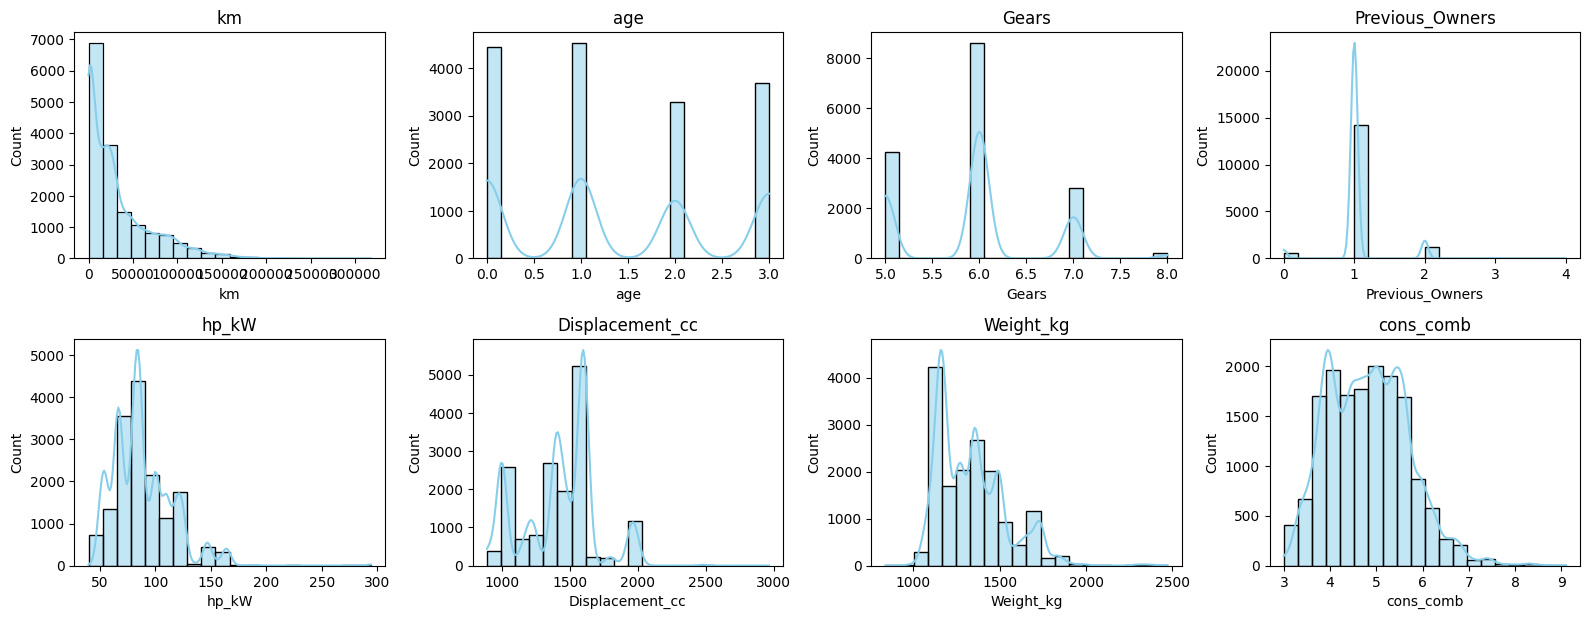

In [7]:
plt.figure(figsize=(16, 12))

for i, col in enumerate(num_cols, 1):
    plt.subplot(4, 4, i)   # adjust layout grid (4x4 here)
    sns.histplot(x[col], bins=20, kde=True, color='skyblue', edgecolor='black')
    plt.title(col)
    plt.tight_layout()

plt.show()

#### **2.1.3** <font color =red> [3 marks] </font>
Identify categorical predictors and plot their frequency distributions.

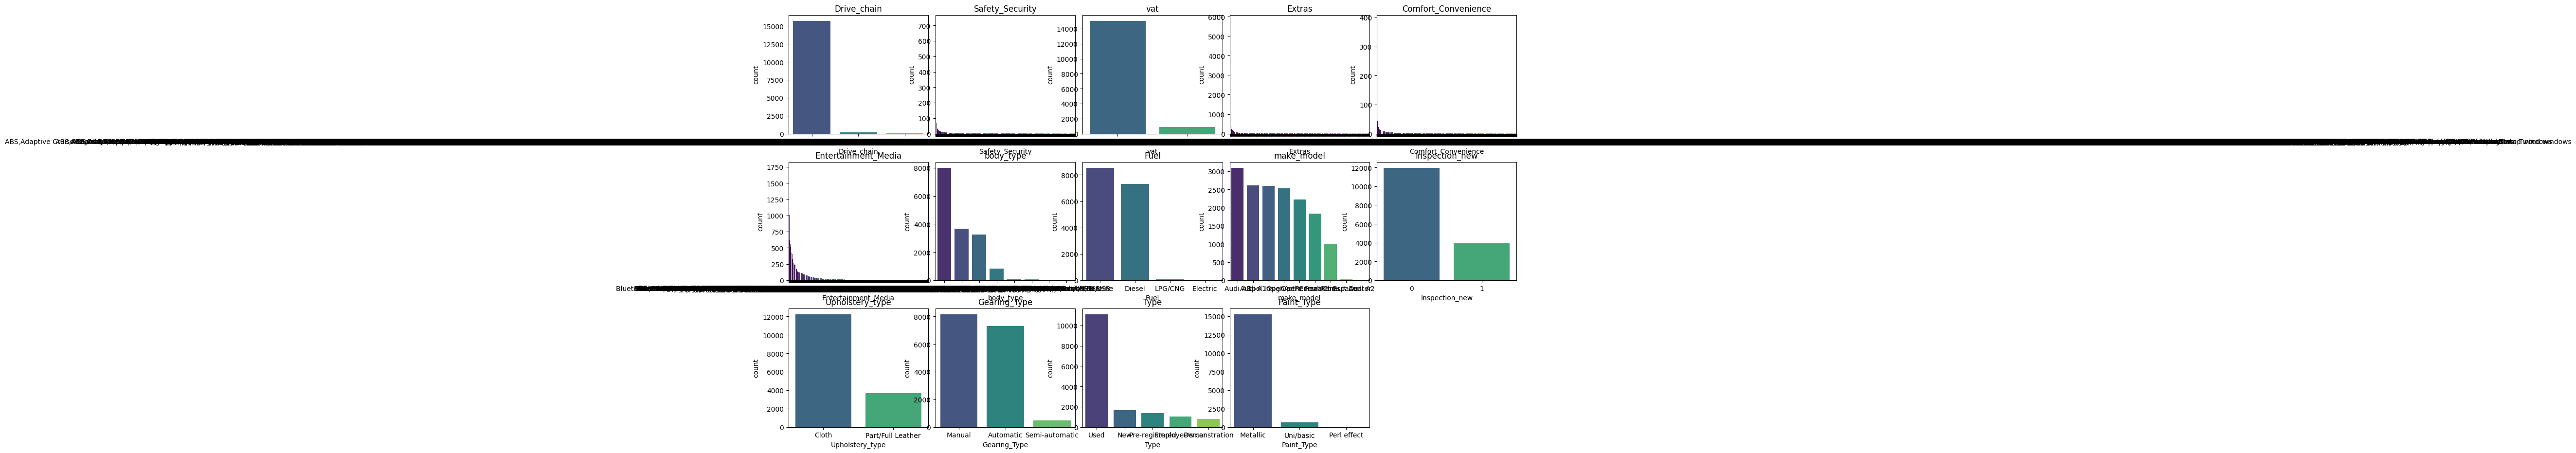

In [6]:

# Identify categorical columns and check their frequency distributions
plt.figure(figsize=(16, 12))

for i, col in enumerate(cat_cols, 1):
  plt.subplot(4, 5, i)
  sns.countplot(data=x[cat_cols], x=col, palette='viridis', order=x[col].value_counts().index)
  plt.title(col)
  plt.tight_layout()

plt.show()

In [8]:
analyse_cols = ["Comfort_Convenience", "Entertainment_Media", "Extras", "Safety_Security"]

**Note**: Look carefully at the values stored in columns `["Comfort_Convenience", "Entertainment_Media", "Extras", "Safety_Security"]`.

Should they be considered categorical? Should they be dropped or handled any other way?

#### **2.1.4** <font color =red> [3 marks] </font>
Fix columns with low frequency values and class imbalances.

Some information regarding values in the `Type` column that may help:
- *'Pre-registered'* cars are ones which have already been registered previously by the seller.
- *'New'* cars are not necessarily new cars, but new-like cars. These might also have multiple owners due to multiple pre-registrations as well.
- *'Employee's car'* are cars used by employees over a short period of time and small distance.
- *'Demonstration'* cars are used for trial purposes and also driven for a short time and distance.

Based on these, you can handle this particular column. For other columns, decide a strategy on your own.

In [9]:
# Fix columns as needed
#Let us first convert the records in above columns to lists.
for c in analyse_cols:
  x[c] = x[c].fillna('')
  x[c] = x[c].str.split(',')

In [10]:
x["Comfort_Convenience"] #list of all the columns

,Comfort_Convenience
0,"[Air conditioning, Armrest, Automatic climate ..."
1,"[Air conditioning, Automatic climate control, ..."
2,"[Air conditioning, Cruise control, Electrical ..."
3,"[Air suspension, Armrest, Auxiliary heating, E..."
4,"[Air conditioning, Armrest, Automatic climate ..."
...,...
15910,"[Air conditioning, Automatic climate control, ..."
15911,"[Air conditioning, Automatic climate control, ..."
15912,"[Air conditioning, Armrest, Automatic climate ..."
15913,"[Air conditioning, Automatic climate control, ..."


In [11]:
mlb = MultiLabelBinarizer()
for c in analyse_cols:
  features_encoded = mlb.fit_transform(x[c])
  features_encoded = pd.DataFrame(features_encoded, columns=mlb.classes_)
  features_encoded = features_encoded.loc[:, features_encoded.sum() > 100]
  x = pd.concat([x, features_encoded], axis=1)
  x = x.drop(c, axis=1)
x

,make_model,body_type,vat,km,Type,Fuel,Gears,age,Previous_Owners,hp_kW,...,LED Headlights,Lane departure warning system,Passenger-side airbag,Power steering,Rear airbag,Side airbag,Tire pressure monitoring system,Traction control,Traffic sign recognition,Xenon headlights
0,Audi A1,Sedans,VAT deductible,56013.000000,Used,Diesel,7.0,3.0,2.0,66.0,...,0,0,1,1,0,1,1,1,0,1
1,Audi A1,Sedans,Price negotiable,80000.000000,Used,Benzine,7.0,2.0,1.0,141.0,...,0,0,1,1,0,1,1,1,0,1
2,Audi A1,Sedans,VAT deductible,83450.000000,Used,Diesel,7.0,3.0,1.0,85.0,...,0,0,1,1,0,1,1,1,0,0
3,Audi A1,Sedans,VAT deductible,73000.000000,Used,Diesel,6.0,3.0,1.0,66.0,...,0,0,1,1,0,1,1,0,0,0
4,Audi A1,Sedans,VAT deductible,16200.000000,Used,Diesel,7.0,3.0,1.0,66.0,...,0,0,1,1,0,1,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15910,Renault Espace,Van,VAT deductible,1647.362609,New,Diesel,6.0,0.0,1.0,147.0,...,1,1,1,1,1,1,1,1,1,0
15911,Renault Espace,Van,VAT deductible,9900.000000,Used,Benzine,7.0,0.0,1.0,165.0,...,1,1,1,1,0,1,1,1,1,0
15912,Renault Espace,Van,VAT deductible,15.000000,Pre-registered,Diesel,6.0,0.0,1.0,146.0,...,1,1,1,1,0,1,0,1,1,0
15913,Renault Espace,Van,VAT deductible,10.000000,Pre-registered,Diesel,6.0,0.0,1.0,147.0,...,1,0,1,1,0,1,1,0,1,0


In [12]:
x.columns

Index(['make_model', 'body_type', 'vat', 'km', 'Type', 'Fuel', 'Gears', 'age',
       'Previous_Owners', 'hp_kW',
       ...
       'LED Headlights', 'Lane departure warning system',
       'Passenger-side airbag', 'Power steering', 'Rear airbag', 'Side airbag',
       'Tire pressure monitoring system', 'Traction control',
       'Traffic sign recognition', 'Xenon headlights'],
      dtype='object', length=101)

#### **2.1.5** <font color =red> [3 marks] </font>
Identify target variable and plot the frequency distributions. Apply necessary transformations.

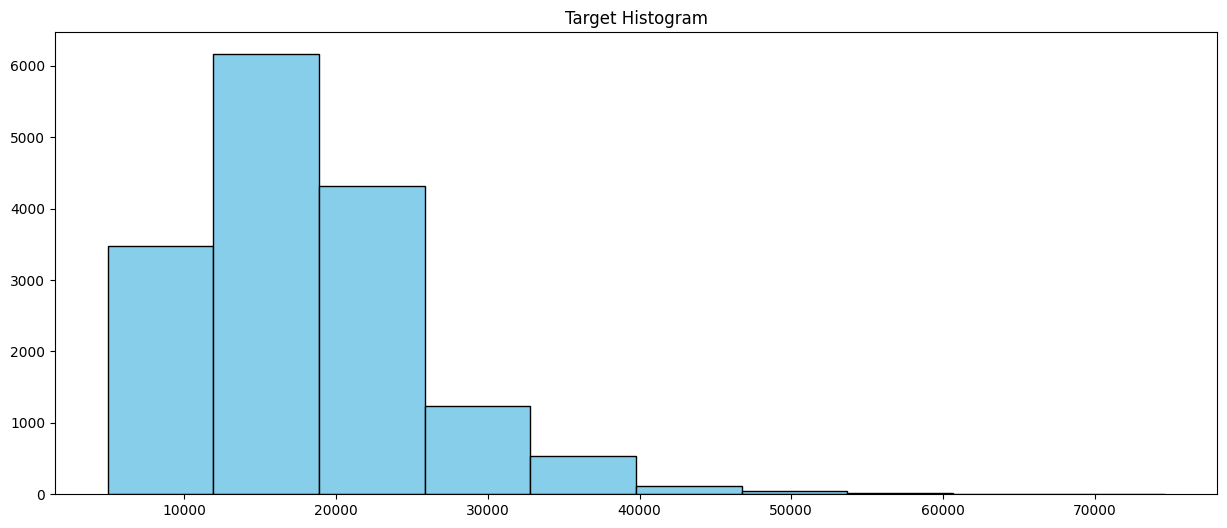

In [13]:
# Plot histograms for target feature
#target feature is the price
plt.figure(figsize = (15, 6))
plt.hist(y, bins=10, range=None, color='skyblue', edgecolor='black')
plt.title("Target Histogram")
plt.show()
#plot shows that target seem to be right skewed

**The target variable seems to be skewed. Perform suitable transformation on the target.**

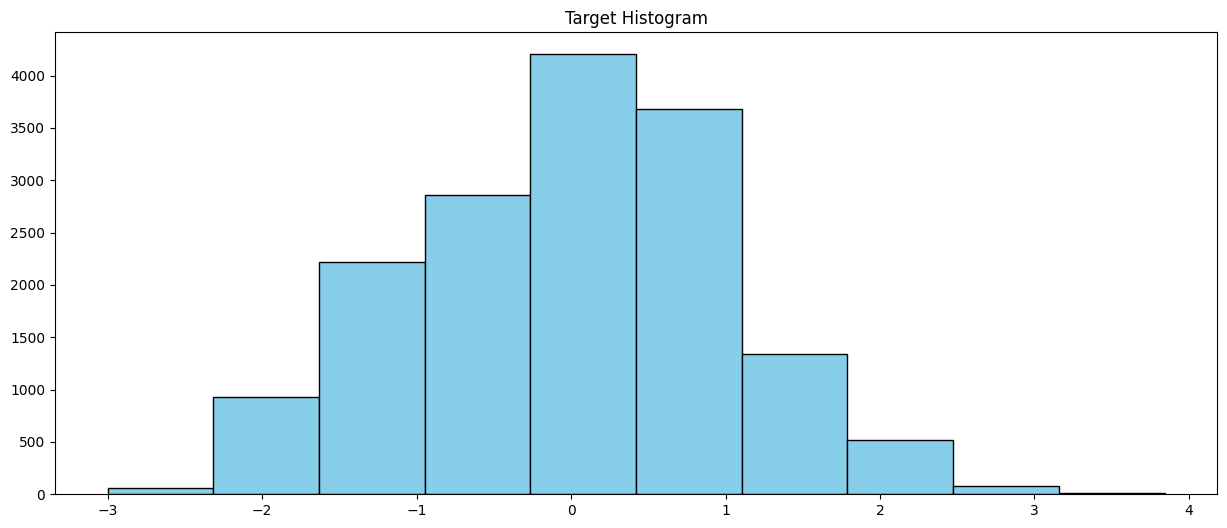

In [14]:
# Transform the target feature
y.skew() # we can see that the skew number is 0.999, and since this is positively skewed, transforms like box-cox or Yeo-Johnson will help.
#sklearn preprocessing already has Yeo-Johnson transform technique. Using that
pt = PowerTransformer(method='yeo-johnson')
y = pt.fit_transform(y.values.reshape(-1, 1))

plt.figure(figsize = (15, 6))
plt.hist(y, bins=10, range=None, color='skyblue', edgecolor='black')
plt.title("Target Histogram")
plt.show()

In [15]:
y = pd.DataFrame(y, index = car_df.index, columns = ['price'])

### **2.2 Correlation analysis** <font color = red> [6 marks] </font>

#### **2.2.1** <font color =red> [3 marks] </font>
Plot the correlation map between features and target variable.

In [16]:
# Visualise correlation
x_num_cols = list(set(x.columns)-set(cat_cols))
len(x_num_cols) #91 columns

91

In [17]:
x_num = pd.DataFrame()
for col in x_num_cols:
  x_num[col] = x[col]
x_num

,Digital radio,Rear airbag,USB,Side airbag,Armrest,Massage seats,Previous_Owners,Electrically heated windshield,LED Headlights,Daytime running lights,...,Light sensor,Immobilizer,Electrically adjustable seats,Emergency brake assistant,Fog lights,Isofix,Sport package,Seat heating,km,Power windows
0,0,0,0,1,1,0,2.0,0,0,1,...,1,1,0,0,1,1,0,1,56013.000000,1
1,0,0,0,1,0,0,1.0,0,0,1,...,0,1,0,0,0,1,0,0,80000.000000,1
2,0,0,0,1,0,0,1.0,0,0,1,...,0,1,0,0,0,1,0,1,83450.000000,1
3,0,0,1,1,1,0,1.0,0,0,0,...,1,1,0,0,0,1,0,1,73000.000000,1
4,0,0,1,1,1,0,1.0,0,0,0,...,1,1,0,0,1,1,1,0,16200.000000,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15910,1,1,1,1,0,1,1.0,0,1,0,...,1,1,1,1,0,1,0,0,1647.362609,1
15911,1,0,1,1,0,0,1.0,1,1,1,...,1,1,0,1,0,1,0,1,9900.000000,1
15912,0,0,0,1,1,1,1.0,1,1,1,...,1,1,0,1,0,1,0,1,15.000000,1
15913,1,0,1,1,0,0,1.0,0,1,0,...,1,0,1,1,0,1,0,0,10.000000,1


<Axes: >

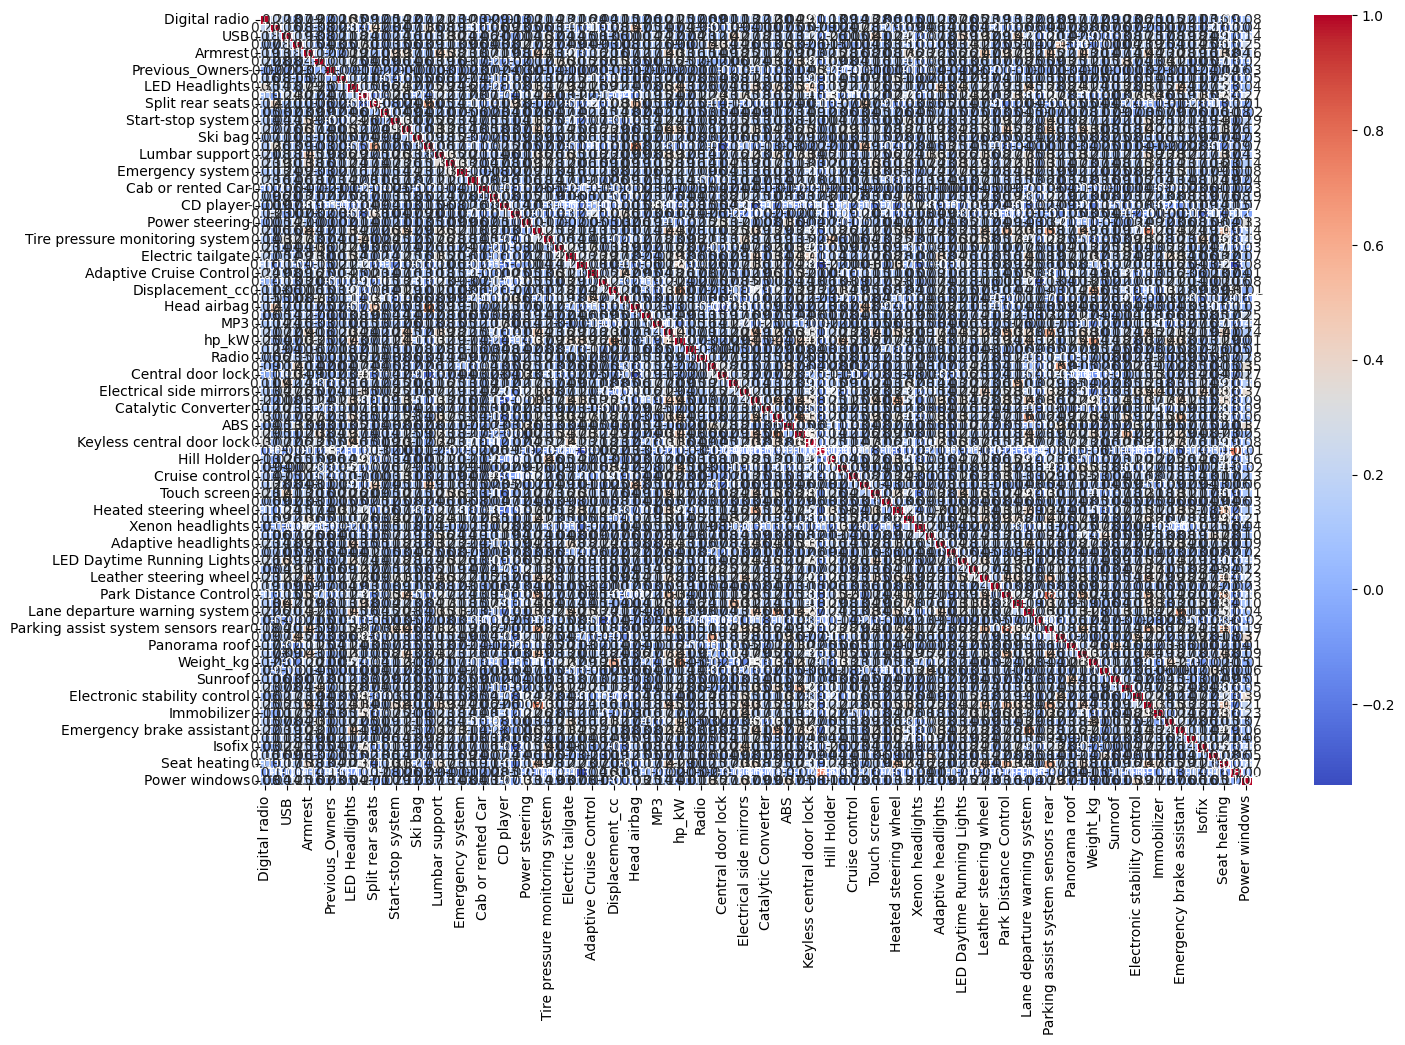

In [18]:
corr_matrix = x_num.corr()
plt.figure(figsize=(16, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)

In [19]:
#there are 91 columns and all there would may or may not be necessary
#also 2 or more columns may carry redundant information
upper = abs(corr_matrix).where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
to_drop = [column for column in upper.columns if any(upper[column] > 0.8)]

x_num = x_num.drop(columns=to_drop)

In [22]:
x_num

,Alarm system,Roof rack,Sport suspension,Power steering,Massage seats,Heated steering wheel,Parking assist system sensors rear,Cab or rented Car,age,Bluetooth,...,Split rear seats,Central door lock,Emergency system,Seat heating,ABS,Sport seats,Emergency brake assistant,Air conditioning,CD player,Head airbag
0,0,0,0,1,0,0,1,0,3.0,1,...,0,1,0,1,1,0,0,1,0,0
1,0,0,1,1,0,0,1,0,2.0,1,...,0,1,0,0,1,1,0,1,0,1
2,0,0,0,1,0,0,1,0,3.0,0,...,0,1,0,1,1,0,0,1,0,0
3,1,0,0,1,0,0,0,0,3.0,1,...,1,0,1,1,1,1,0,0,1,1
4,0,0,1,1,0,0,1,0,3.0,1,...,0,1,0,0,1,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15910,0,0,0,1,1,0,1,0,0.0,1,...,1,1,0,0,1,0,1,1,0,1
15911,0,0,0,1,0,1,1,0,0.0,1,...,0,1,0,1,1,0,1,1,0,0
15912,0,0,0,1,1,1,1,0,0.0,1,...,0,1,0,1,1,0,1,1,0,0
15913,0,0,0,1,0,0,0,0,0.0,1,...,0,0,0,0,1,0,1,1,0,0


#### **2.2.2** <font color =red> [3 marks] </font>
Analyse correlation between categorical features and target variable.

In [20]:
# Comparing average values of target for different categories
cat_cols
#lets group and compute average
#group = car_df.groupby("make_model")["price"].mean()
#group

['Drive_chain',
 'Safety_Security',
 'vat',
 'Extras',
 'Comfort_Convenience',
 'Entertainment_Media',
 'body_type',
 'Fuel',
 'make_model',
 'Inspection_new',
 'Upholstery_type',
 'Gearing_Type',
 'Type',
 'Paint_Type']

In [21]:
car_df["Upholstery_type"].unique()

array(['Cloth', 'Part/Full Leather'], dtype=object)

In [22]:
x_encoded = pd.get_dummies(car_df[cat_cols], drop_first=True)

### **2.3 Outlier analysis** <font color = red> [5 marks] </font>

#### **2.3.1** <font color =red> [2 marks] </font>
Identify potential outliers in the data.

In [23]:
# Outliers present in each column
#Let us define IQR method to get the outliers
num_cols = x_num.columns
num_cols

Index(['Digital radio', 'Rear airbag', 'USB', 'Side airbag', 'Armrest',
       'Massage seats', 'Previous_Owners', 'Electrically heated windshield',
       'LED Headlights', 'Daytime running lights', 'Split rear seats',
       'Trailer hitch', 'Start-stop system', 'Navigation system', 'Ski bag',
       'Central door lock with remote control', 'Lumbar support',
       'Voice Control', 'Emergency system', 'Sound system',
       'Cab or rented Car', 'On-board computer', 'CD player', 'Alarm system',
       'Power steering', 'Rain sensor', 'Tire pressure monitoring system',
       'Heads-up display', 'Electric tailgate', 'cons_comb',
       'Adaptive Cruise Control', 'Roof rack', 'Displacement_cc',
       'Seat ventilation', 'Head airbag', 'Air conditioning', 'MP3',
       'Parking assist system sensors front', 'hp_kW',
       'Driver drowsiness detection', 'Radio', 'Driver-side airbag',
       'Central door lock', 'Bluetooth', 'Electrical side mirrors',
       'Parking assist system camera

In [24]:
#using IQR method, try and find the outliers
outlier_nums = {}
for col in num_cols:
  Q1 = x_num[col].quantile(0.25)
  Q3 = x_num[col].quantile(0.75)
  IQR = Q3 - Q1
  lower_bound = Q1 - 1.5 * IQR
  upper_bound = Q3 + 1.5 * IQR
  outliers = x_num[(x_num[col] < lower_bound) | (x_num[col] > upper_bound)]
  if len(outliers) > 0:
    outlier_nums[col] = len(outliers)
outlier_nums

{'Digital radio': 2241,
 'Rear airbag': 870,
 'Side airbag': 1917,
 'Massage seats': 360,
 'Previous_Owners': 1757,
 'Electrically heated windshield': 944,
 'LED Headlights': 3307,
 'Split rear seats': 2391,
 'Trailer hitch': 658,
 'Ski bag': 251,
 'Central door lock with remote control': 2399,
 'Lumbar support': 3478,
 'Emergency system': 1580,
 'Sound system': 2244,
 'Cab or rented Car': 310,
 'On-board computer': 2693,
 'Alarm system': 1926,
 'Power steering': 1426,
 'Heads-up display': 609,
 'Electric tailgate': 1113,
 'cons_comb': 125,
 'Adaptive Cruise Control': 1310,
 'Roof rack': 3053,
 'Displacement_cc': 21,
 'Seat ventilation': 838,
 'Head airbag': 2188,
 'Air conditioning': 820,
 'hp_kW': 361,
 'Driver drowsiness detection': 510,
 'Radio': 2719,
 'Driver-side airbag': 1114,
 'Central door lock': 2340,
 'Bluetooth': 3230,
 'Electrical side mirrors': 3427,
 'Parking assist system camera': 3681,
 'Catalytic Converter': 2262,
 'Traffic sign recognition': 2058,
 'ABS': 893,
 'Bli

In [25]:
import numpy as np
outliers = list(outlier_nums.keys())
x_outliers = pd.DataFrame()
for cols in outliers:
  x_outliers[cols] = x_num[cols]
corr_y = x_outliers.corrwith(pd.Series(y.squeeze(), index=x_outliers.index))
corr_y = pd.DataFrame(corr_y, columns=['Correlation'])

<Axes: >

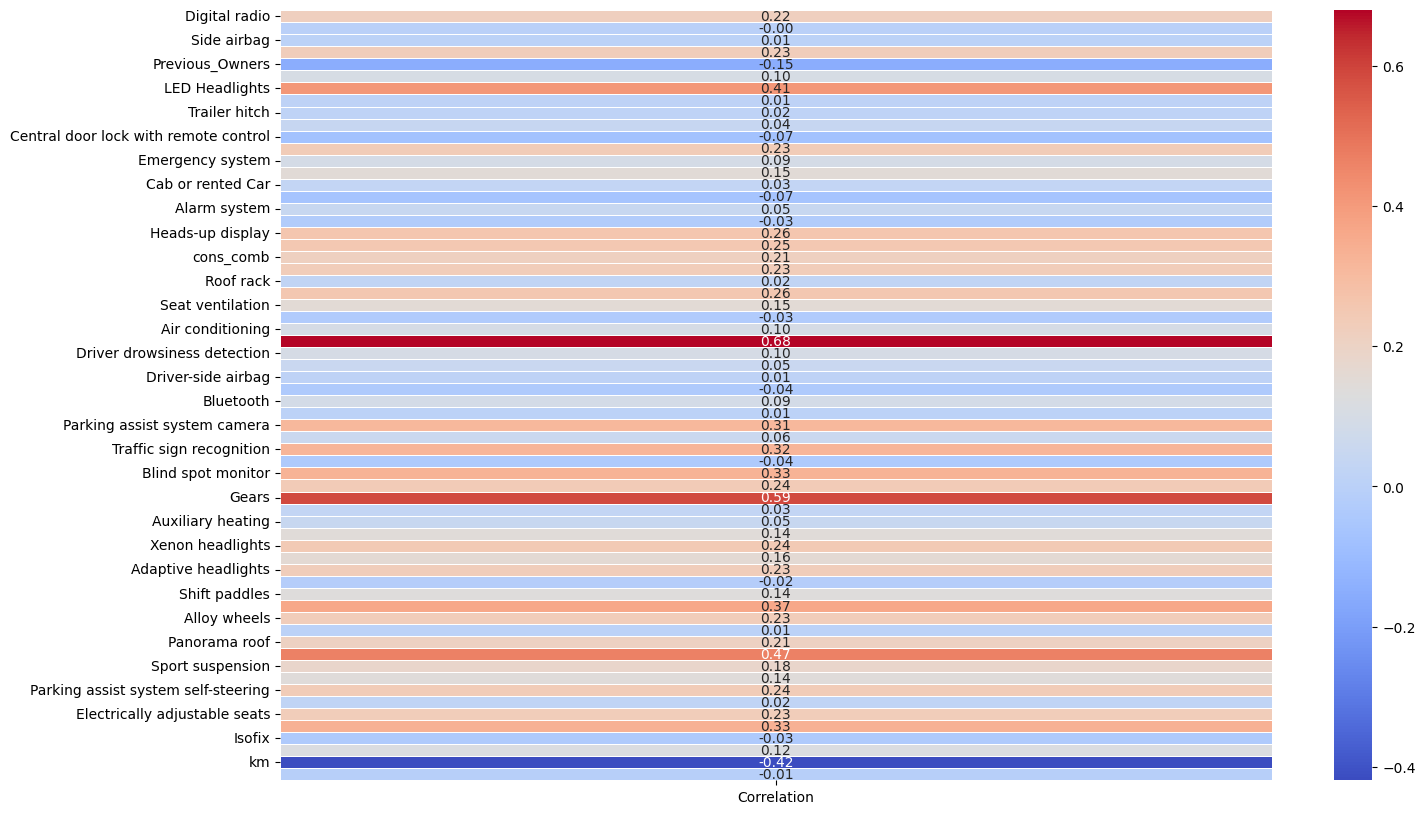

In [26]:
plt.figure(figsize=(16, 10))
sns.heatmap(corr_y, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)

In [27]:
corr_y[abs(corr_y['Correlation']) < 0.30] #these are the columns which have outliers and not really that well correlated with price. Thus we can get rid of/winsorise outliers here.
wins_cols = list(corr_y.index) #get all the columns that can undergo winsorisation

#### **2.3.2** <font color =red> [3 marks] </font>
Handle the outliers suitably.

In [28]:
# Handle outliers

#now understand handle the outliers
for col in wins_cols:
  Q1 = x_num[col].quantile(0.25)
  Q3 = x_num[col].quantile(0.75)
  IQR = Q3 - Q1
  lower_bound = Q1 - 1.5 * IQR
  upper_bound = Q3 + 1.5 * IQR
  x_num[col] = x_num[col].clip(lower=lower_bound, upper=upper_bound)

### **2.4 Feature Engineering** <font color = red> [11 marks] </font>

#### **2.4.1**
Fix any redundant columns and create new ones if needed.

In [29]:
# Fix/create columns as needed
x_num_cols = x_num.columns


#### **2.4.2** <font color =red> [4 marks] </font>
Analysis and feature engineering on `['Comfort_Convenience', 'Entertainment_Media', 'Extras', 'Safety_Security']`.

These columns contains lists of features present. Decide on how to include these features in the predictors.

In [30]:
# Check unique values in each feature spec columns
unique_dictionary = {}
for col in x_num_cols:
  unique_dictionary[col] = x_num[col].unique()
unique_dictionary

{'Digital radio': array([0]),
 'Rear airbag': array([0]),
 'USB': array([0, 1]),
 'Side airbag': array([1]),
 'Armrest': array([1, 0]),
 'Massage seats': array([0]),
 'Previous_Owners': array([1.]),
 'Electrically heated windshield': array([0]),
 'LED Headlights': array([0]),
 'Daytime running lights': array([1, 0]),
 'Split rear seats': array([0]),
 'Trailer hitch': array([0]),
 'Start-stop system': array([1, 0]),
 'Navigation system': array([1, 0]),
 'Ski bag': array([0]),
 'Central door lock with remote control': array([0]),
 'Lumbar support': array([0]),
 'Voice Control': array([1, 0]),
 'Emergency system': array([0]),
 'Sound system': array([0]),
 'Cab or rented Car': array([0]),
 'On-board computer': array([1]),
 'CD player': array([0, 1]),
 'Alarm system': array([0]),
 'Power steering': array([1]),
 'Rain sensor': array([1, 0]),
 'Tire pressure monitoring system': array([1, 0]),
 'Heads-up display': array([0]),
 'Electric tailgate': array([0]),
 'cons_comb': array([3.8 , 5.6 , 4

In [31]:
#got all the unique values in each col
value = np.array([0])
zero_val = [k for k, v in unique_dictionary.items() if np.array_equal(v, value)]

Out of these features, we will check the ones which are present in most of the cars or are absent from most of the cars. These kinds of features can be removed as they just increase the dimensionality without explaining the variance.

In [32]:
# Drop features from df
for col in zero_val:
  x_num = x_num.drop(col, axis=1)

In [33]:
value = np.array([0, 1])
one_val = [k for k, v in unique_dictionary.items() if np.array_equal(v, value)]
#get the sum of true and check how many sums are present => In total there are 15,915 number of records
for o in one_val:
  print(o, x_num[o].sum())

value_2 = np.array([0, 1])
val_one = [k for k, v in unique_dictionary.items() if np.array_equal(v, value_2)]
#get the sum of true and check how many sums are present => In total there are 15,915 number of records
for o in val_one:
  print(o, x_num[o].sum())

#all the column seems to have enough true values to be considered

USB 9019
CD player 5024
MP3 6258
Parking assist system sensors front 6103
Touch screen 4050
LED Daytime Running Lights 5910
USB 9019
CD player 5024
MP3 6258
Parking assist system sensors front 6103
Touch screen 4050
LED Daytime Running Lights 5910


#### **2.4.3** <font color =red> [3 marks] </font>
Perform feature encoding.

In [34]:
# Encode features
encoder = OneHotEncoder(sparse_output=False, drop='first')
cat_encoded = pd.DataFrame(index=x.index)

for col in cat_cols:
    if col not in x.columns:
        print(f"Skipping missing column: {col}")
        continue

    cats = encoder.fit_transform(x[[col]])
    cats = pd.DataFrame(
        cats,
        columns=encoder.get_feature_names_out([col]),
        index=x.index
    )

    cat_encoded = pd.concat([cat_encoded, cats], axis=1)

# Merge numeric + encoded features
x_num_merged = pd.concat([x_num, cat_encoded], axis=1)

# Align target with same index
x_num_merged = pd.concat([x_num_merged, y], axis=1)

Skipping missing column: Safety_Security
Skipping missing column: Extras
Skipping missing column: Comfort_Convenience
Skipping missing column: Entertainment_Media


In [38]:
y

,price
0,-0.143382
1,-0.353642
2,-0.329605
3,-0.353642
4,0.013905
...,...
15910,2.218966
15911,2.214771
15912,2.214126
15913,2.202797


In [35]:
x_num_merged.to_csv("merged_dataset.csv", index=False)

In [36]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder ,MultiLabelBinarizer, PowerTransformer #columns have stacked info, need multi hot encoding

In [37]:
x_df = pd.read_csv("/content/merged_dataset.csv")
x_df.head()

,USB,Side airbag,Armrest,Previous_Owners,Daytime running lights,Start-stop system,Navigation system,Voice Control,On-board computer,CD player,...,Upholstery_type_Part/Full Leather,Gearing_Type_Manual,Gearing_Type_Semi-automatic,Type_Employee's car,Type_New,Type_Pre-registered,Type_Used,Paint_Type_Perl effect,Paint_Type_Uni/basic,price
0,0,1,1,1.0,1,1,1,1,1,0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,-0.143382
1,0,1,0,1.0,1,1,0,1,1,0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,-0.353642
2,0,1,0,1.0,1,1,1,1,1,0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,-0.329605
3,1,1,1,1.0,0,1,1,1,1,1,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,-0.353642
4,1,1,1,1.0,0,1,0,1,1,1,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.013905


In [42]:
x_df['price']

,price
0,-0.143382
1,-0.353642
2,-0.329605
3,-0.353642
4,0.013905
...,...
15910,2.218966
15911,2.214771
15912,2.214126
15913,2.202797


#### **2.4.4** <font color =red> [2 marks] </font>
Split the data into training and testing sets.

In [38]:
# Split data
y = x_df['price']
x_df = x_df.drop('price', axis=1)
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_df, y)

#### **2.4.5** <font color =red> [2 marks] </font>
Scale the features.

In [39]:
# Scale features
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

## **3 Linear Regression Models** <font color =red> [35 marks] </font>


### **3.1 Baseline Linear Regression Model** <font color =red> [10 marks] </font>

#### **3.1.1** <font color =red> [5 marks] </font>
Build and fit a basic linear regression model. Perform evaluation using suitable metrics.

In [40]:
# Initialise and train model
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(x_train_scaled, y_train)
y_train_pred = lr.predict(x_train_scaled)
y_test_pred = lr.predict(x_test_scaled)

In [41]:
# Evaluate the model's performance

from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
#mean squared errors
train_mse = mean_squared_error(y_train, y_train_pred)
test_mse = mean_squared_error(y_test, y_test_pred)
print("Train MSE:", train_mse)
print("Test MSE:", test_mse)

#mean absolute error
train_mae = mean_absolute_error(y_train, y_train_pred)
test_mae = mean_absolute_error(y_test, y_test_pred)
print("Train MAE:", train_mae)
print("Test MAE:", test_mae)

#r-squared
train_r2 = r2_score(y_train, y_train_pred)
test_r2 = r2_score(y_test, y_test_pred)
print("Train r2:", train_r2)
print("Test r2:", test_r2)


Train MSE: 0.07828685729146481
Test MSE: 0.08002375203549261
Train MAE: 0.2070925239034317
Test MAE: 0.2079719337144986
Train r2: 0.9217776633009609
Test r2: 0.9197767164515483


#### **3.1.2** <font color =red> [5 marks] </font>
Analyse residuals and check other assumptions of linear regression.

Check for linearity by analysing residuals vs predicted values

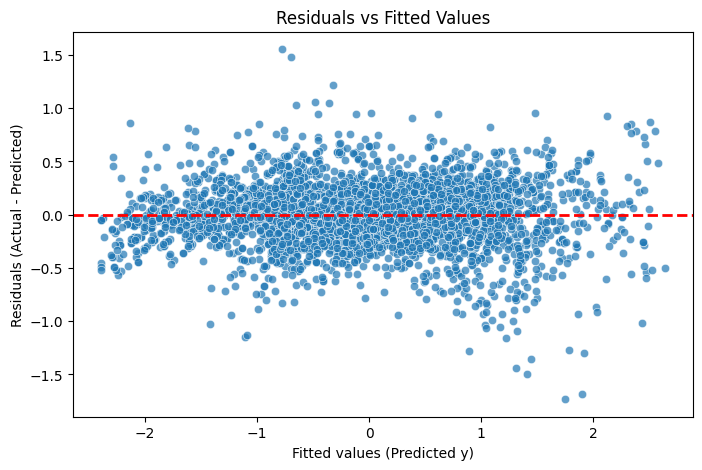

In [42]:
# Linearity check: Plot residuals vs fitted values
residuals = y_test_pred - y_test

# Plot residuals vs fitted values
plt.figure(figsize=(8,5))
sns.scatterplot(x=y_test_pred, y=residuals, alpha=0.7)
plt.axhline(y=0, color='r', linestyle='--', linewidth=2)
plt.xlabel('Fitted values (Predicted y)')
plt.ylabel('Residuals (Actual - Predicted)')
plt.title('Residuals vs Fitted Values')
plt.show()
#the residues are evenly and non-pattern distributed across 0. This has good linearity

Check normality in residual distribution

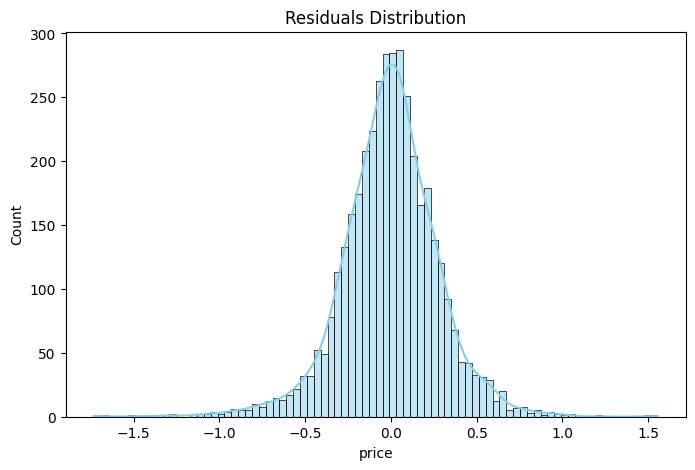

In [43]:
# Check the normality of residuals by plotting their distribution
plt.figure(figsize=(8,5))
sns.histplot(residuals, kde=True, color='skyblue', edgecolor='black')
plt.title("Residuals Distribution")
plt.show()
#it is almost normally distributed

Check multicollinearity using Variance Inflation Factor (VIF) and handle features with high VIF.

In [44]:
# Check for multicollinearity and handle
#VIF tells how much multicollinearity exists
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif_data = pd.DataFrame()
vif_data["Feature"] = x_df.columns
vif_data["VIF"] = [variance_inflation_factor(x_df.values, i) for i in range(x_df.shape[1])]

print(vif_data)

                   Feature       VIF
0                      USB  1.613980
1              Side airbag  0.000000
2                  Armrest  2.131862
3          Previous_Owners  0.000000
4   Daytime running lights  1.657717
..                     ...       ...
74                Type_New  2.902713
75     Type_Pre-registered  2.635959
76               Type_Used  5.655035
77  Paint_Type_Perl effect  1.075743
78    Paint_Type_Uni/basic  1.127980

[79 rows x 2 columns]


In [45]:
#features with vif > 10 are considered to have high multicolinearity and vif 1 to 5 are considered to have good linearity
vif_data[vif_data['VIF'] > 5]
#no vifs greater than 10. The above can still be solved using regularisation

,Feature,VIF
14,Displacement_cc,6.564988
18,hp_kW,7.865992
57,body_type_Van,6.774420
58,Fuel_Diesel,6.728022
65,make_model_Opel Insignia,5.799263
68,make_model_Renault Espace,9.398391
76,Type_Used,5.655035


### **3.2 Ridge Regression Implementation** <font color =red> [10 marks] </font>

#### **3.2.1** <font color =red> [2 marks] </font>
Define a list of random alpha values

In [46]:
# List of alphas to tune for Ridge regularisation
# Lets define alpha in a standard manner
alphas = np.logspace(-3, 3, 20)

#### **3.2.2** <font color =red> [4 marks] </font>
Apply Ridge Regularisation and find the best value of alpha from the list

In [47]:
# Applying Ridge regression
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge
ridge = Ridge()
param = {'alpha': alphas}
tune = GridSearchCV(ridge, param, scoring='neg_mean_absolute_error', cv=5) #5-fold, and scoring is neg mae
tune.fit(x_train_scaled, y_train)

GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': array([1.00000000e-03, 2.06913808e-03, 4.28133240e-03, 8.85866790e-03,
       1.83298071e-02, 3.79269019e-02, 7.84759970e-02, 1.62377674e-01,
       3.35981829e-01, 6.95192796e-01, 1.43844989e+00, 2.97635144e+00,
       6.15848211e+00, 1.27427499e+01, 2.63665090e+01, 5.45559478e+01,
       1.12883789e+02, 2.33572147e+02, 4.83293024e+02, 1.00000000e+03])},
             scoring='neg_mean_absolute_error')

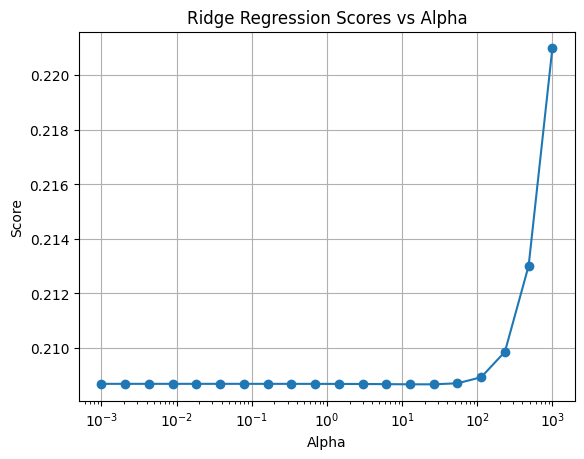

In [48]:
# Plot train and test scores against alpha
results = tune.cv_results_
alpha_values = results["param_alpha"] #gives the alphas used
scores_test = -results['mean_test_score'] #gives the test scores

# Plot line plot
plt.plot(alphas, scores_test, marker='o')
plt.xscale('log')     # optional if alphas are in log scale
plt.xlabel('Alpha')
plt.ylabel('Score')
plt.title('Ridge Regression Scores vs Alpha')
plt.grid(True)
plt.show()

Find the best alpha value.

In [49]:
# Best alpha value
best_alpha = tune.best_params_['alpha']
print("best alpha : ",best_alpha)

# Best score (negative MAE)
best_score = tune.best_score_
print("best mae score : ",-best_score)


best alpha :  12.742749857031322
best mae score :  0.20866923113563543


We will get some best value of alpha above. This however is not the most accurate value but the best value from the given list. Now we have a rough estimate of the range that best alpha falls in. Let us do another iteration over the values in a smaller range.

#### **3.2.3** <font color =red> [4 marks] </font>
Fine tune by taking a closer range of alpha based on the previous result.

In [50]:
# Take a smaller range of alpha to test
#best alpha is 26.3 => lets space it accordingly
alphas = [22.5, 23, 23.5, 24, 24.5, 25, 25.5, 26, 26.5]

In [51]:
# Applying Ridge regression
ridge = Ridge()
param = {'alpha': alphas}
tune = GridSearchCV(ridge, param, scoring='neg_mean_absolute_error', cv=5)
tune.fit(x_train_scaled, y_train)

GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [22.5, 23, 23.5, 24, 24.5, 25, 25.5, 26,
                                   26.5]},
             scoring='neg_mean_absolute_error')

Plot the error-alpha graph again and find the actual optimal value for alpha.

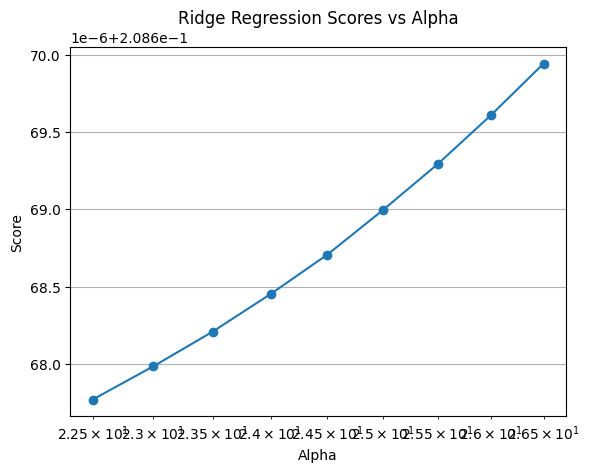

Best Alpha: 22.5
Best Score: 0.208667769190119


In [52]:
# Plot train and test scores against alpha
results = tune.cv_results_
alpha_values = results["param_alpha"] #gives the alphas used
scores_test = -results['mean_test_score'] #gives the test scores

# Plot line plot
plt.plot(alphas, scores_test, marker='o')
plt.xscale('log')     # optional if alphas are in log scale
plt.xlabel('Alpha')
plt.ylabel('Score')
plt.title('Ridge Regression Scores vs Alpha')
plt.grid(True)
plt.show()

# Best alpha value
print("Best Alpha:", tune.best_params_['alpha'])


# Best score (negative MAE)
print("Best Score:", -tune.best_score_)


In [53]:
# Set best alpha for Ridge regression
# Fit the Ridge model to get the coefficients of the fitted model
ridge_model = Ridge(tune.best_params_['alpha'])
ridge_model.fit(x_train_scaled, y_train)
coefficients = ridge_model.coef_
intercept = ridge_model.intercept_


In [54]:
# Show the coefficients for each feature
x_train_scaled = pd.DataFrame(x_train_scaled, columns=x_df.columns)
coef_df_ridge = pd.DataFrame({
    'Feature': x_train_scaled.columns,
    'Coefficient': ridge_model.coef_
}).sort_values(by='Coefficient', ascending=False)

coef_df_ridge

,Feature,Coefficient
18,hp_kW,0.286773
68,make_model_Renault Espace,0.103314
62,make_model_Audi A3,0.080550
72,Gearing_Type_Semi-automatic,0.051664
58,Fuel_Diesel,0.049170
...,...,...
63,make_model_Opel Astra,-0.211539
46,km,-0.223388
25,age,-0.243356
66,make_model_Renault Clio,-0.312562


In [55]:
# Evaluate the Ridge model on the test data
y_pred_test = ridge_model.predict(x_test_scaled)
#predicted the results
y_pred_train = ridge_model.predict(x_train_scaled)

In [56]:
mae_train_ridge = mean_absolute_error(y_train, y_pred_train)
mse_train_ridge = mean_squared_error(y_train, y_pred_train)
r2_train_ridge = r2_score(y_train, y_pred_train)

print(f"Mean Absolute Error (MAE): {mae_train_ridge:.4f}")
print(f"Mean Squared Error (MSE): {mse_train_ridge:.4f}")
print(f"R² Score: {r2_train_ridge:.4f}")

Mean Absolute Error (MAE): 0.2071
Mean Squared Error (MSE): 0.0783
R² Score: 0.9218


In [57]:
#now lets find the scores
mae_ridge = mean_absolute_error(y_test, y_pred_test)
mse_ridge = mean_squared_error(y_test, y_pred_test)
r2_ridge = r2_score(y_test, y_pred_test)

print(f"Mean Absolute Error (MAE): {mae_ridge:.4f}")
print(f"Mean Squared Error (MSE): {mse_ridge:.4f}")
print(f"R² Score: {r2_ridge:.4f}")
#two scores are comparable

Mean Absolute Error (MAE): 0.2079
Mean Squared Error (MSE): 0.0800
R² Score: 0.9198


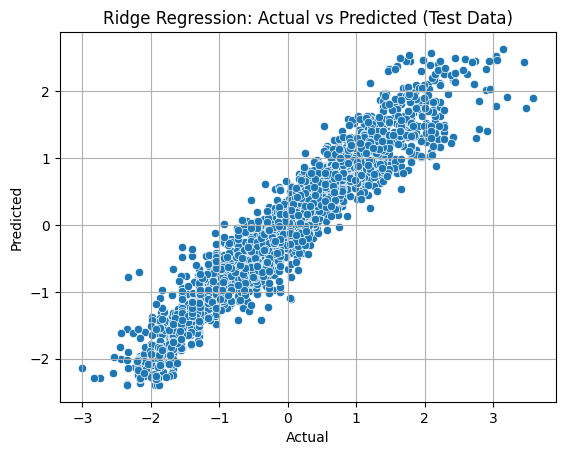

In [58]:
sns.scatterplot(x=y_test, y=y_test_pred)
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("Ridge Regression: Actual vs Predicted (Test Data)")
plt.grid(True)
plt.show()
#they look good!

### **3.3 Lasso Regression Implementation** <font color =red> [10 marks] </font>

#### **3.3.1** <font color =red> [2 marks] </font>
Define a list of random alpha values

In [59]:
# List of alphas to tune for Lasso regularisation
alphas = np.logspace(-3, 3, 20)


#### **3.3.2** <font color =red> [4 marks] </font>
Apply Ridge Regularisation and find the best value of alpha from the list

In [60]:
# Initialise Lasso regression model
from sklearn.linear_model import Lasso
lasso = Lasso()
param = {'alpha': alphas}
tune = GridSearchCV(lasso, param, scoring='neg_mean_absolute_error', cv=5)
tune.fit(x_train_scaled, y_train)

GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': array([1.00000000e-03, 2.06913808e-03, 4.28133240e-03, 8.85866790e-03,
       1.83298071e-02, 3.79269019e-02, 7.84759970e-02, 1.62377674e-01,
       3.35981829e-01, 6.95192796e-01, 1.43844989e+00, 2.97635144e+00,
       6.15848211e+00, 1.27427499e+01, 2.63665090e+01, 5.45559478e+01,
       1.12883789e+02, 2.33572147e+02, 4.83293024e+02, 1.00000000e+03])},
             scoring='neg_mean_absolute_error')

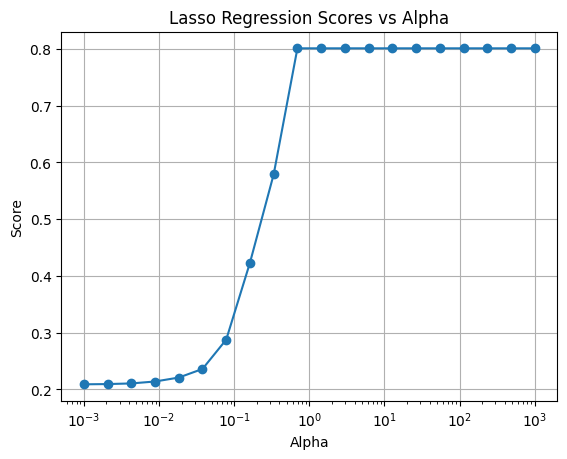

In [61]:
# Plot train and test scores against alpha
results = tune.cv_results_
alpha_values = results["param_alpha"] #gives the alphas used
scores_test = -results['mean_test_score'] #gives the test scores

# Plot line plot
plt.plot(alphas, scores_test, marker='o')
plt.xscale('log')     # optional if alphas are in log scale
plt.xlabel('Alpha')
plt.ylabel('Score')
plt.title('Lasso Regression Scores vs Alpha')
plt.grid(True)
plt.show()

In [62]:
# Best alpha value
best_alpha = tune.best_params_['alpha']
print("best alpha : ",best_alpha)

# Best score (negative MAE)
best_score = tune.best_score_
print("best mae score : ",-best_score)


best alpha :  0.001
best mae score :  0.2087632581354158


#### **3.3.3** <font color =red> [4 marks] </font>
Fine tune by taking a closer range of alpha based on the previous result.

In [63]:
# List of alphas to tune for Lasso regularization
alphas = [0.0001,0.00015, 0.00020,.001, 0.01, 0.1, 1]


In [64]:
# Tuning Lasso hyperparameters
lasso = Lasso()
param = {'alpha': alphas}
tune = GridSearchCV(lasso, param, scoring='neg_mean_absolute_error', cv=5)
tune.fit(x_train_scaled, y_train)

GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.00015, 0.0002, 0.001, 0.01, 0.1,
                                   1]},
             scoring='neg_mean_absolute_error')

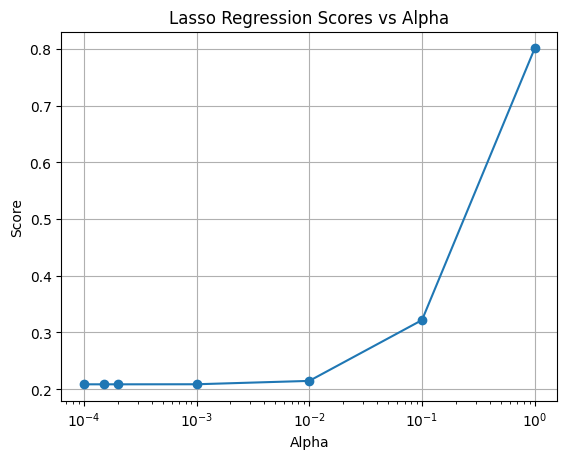

In [65]:
# Plot train and test scores against alpha
results = tune.cv_results_
alpha_values = results["param_alpha"] #gives the alphas used
scores_test = -results['mean_test_score'] #gives the test scores

# Plot line plot
plt.plot(alphas, scores_test, marker='o')
plt.xscale('log')     # optional if alphas are in log scale
plt.xlabel('Alpha')
plt.ylabel('Score')
plt.title('Lasso Regression Scores vs Alpha')
plt.grid(True)
plt.show()


In [66]:
# Best alpha value
best_alpha = tune.best_params_['alpha']
print("best alpha : ",best_alpha)

# Best score (negative MAE)
best_score = tune.best_score_
print("best mae score : ",-best_score)


best alpha :  0.0002
best mae score :  0.2086500823651622


In [67]:
# Set best alpha for Lasso regression
lasso_model = Lasso(best_alpha)

# Fit the Lasso model on scaled training data
lasso_model.fit(x_train_scaled, y_train)

# Get the coefficients of the fitted model
x_train_scaled = pd.DataFrame(x_train_scaled, columns=x_df.columns)
coef_df_lasso = pd.DataFrame({
    'Feature': x_train_scaled.columns,
    'Coefficient': ridge_model.coef_
}).sort_values(by='Coefficient', ascending=False)

In [68]:
# Check the coefficients for each feature
coef_df_lasso


,Feature,Coefficient
18,hp_kW,0.286773
68,make_model_Renault Espace,0.103314
62,make_model_Audi A3,0.080550
72,Gearing_Type_Semi-automatic,0.051664
58,Fuel_Diesel,0.049170
...,...,...
63,make_model_Opel Astra,-0.211539
46,km,-0.223388
25,age,-0.243356
66,make_model_Renault Clio,-0.312562


In [69]:
# Evaluate the Lasso model on the test data
y_pred_test = lasso_model.predict(x_test_scaled)
#predicted the results
y_pred_train = lasso_model.predict(x_train_scaled)


In [70]:
#lets get the scores
mae_train_lasso = mean_absolute_error(y_train, y_pred_train)
mse_train_lasso = mean_squared_error(y_train, y_pred_train)
r2_train_lasso = r2_score(y_train, y_pred_train)

print(f"Mean Absolute Error (MAE): {mae_train_lasso:.4f}")
print(f"Mean Squared Error (MSE): {mse_train_lasso:.4f}")
print(f"R² Score: {r2_train_lasso:.4f}")

Mean Absolute Error (MAE): 0.2071
Mean Squared Error (MSE): 0.0783
R² Score: 0.9218


In [71]:
#now lets find the scores
mae_lasso = mean_absolute_error(y_test, y_pred_test)
mse_lasso = mean_squared_error(y_test, y_pred_test)
r2_lasso = r2_score(y_test, y_pred_test)

print(f"Mean Absolute Error (MAE): {mae_lasso:.4f}")
print(f"Mean Squared Error (MSE): {mse_lasso:.4f}")
print(f"R² Score: {r2_lasso:.4f}")
#two scores are comparable

Mean Absolute Error (MAE): 0.2079
Mean Squared Error (MSE): 0.0800
R² Score: 0.9198


### **3.4 Regularisation Comparison & Analysis** <font color =red> [5 marks] </font>

#### **3.4.1** <font color =red> [2 marks] </font>
Compare the evaluation metrics for each model.

In [72]:
# Compare metrics for each model
#LR: 0.9206089294872207
#RidgeReg: 0.9206
#LassoRidge: 0.9206
LR = [test_mse, test_mae, test_r2]
ridgeR = [mse_ridge, mae_ridge, r2_ridge]
lassoR = [mse_lasso, mae_lasso, r2_lasso]
index = ['MSE', 'MAE', 'r2_score']
col = ['Linear Regression', 'Ridge', 'Lasso']

evaluation_metrics = pd.DataFrame( [LR, ridgeR, lassoR],   # data rows
    columns=index,          # metrics as columns
    index=col               # model names as index
).T
evaluation_metrics

,Linear Regression,Ridge,Lasso
MSE,0.080024,0.080049,0.080017
MAE,0.207972,0.207942,0.207940
r2_score,0.919777,0.919751,0.919783


#### **3.4.2** <font color =red> [3 marks] </font>
Compare the coefficients for the three models.

Also visualise a few of the largest coefficients and the coefficients of features dropped by Lasso.

In [73]:
# Compare highest coefficients and coefficients of eliminated features
#lasso: coef_df_lasso
#ridge: coef_df_ridge
#lr: lr.coef_
coef_df = pd.DataFrame({
    "Linear": lr.coef_,
    "Ridge": ridge_model.coef_,
    "Lasso": lasso_model.coef_
}, index=x_train.columns)

coef_df

,Linear,Ridge,Lasso
USB,-2.536058e-02,-0.025713,-0.025144
Side airbag,6.071532e-18,0.000000,0.000000
Armrest,-7.613931e-03,-0.006806,-0.006632
Previous_Owners,1.804112e-16,0.000000,0.000000
Daytime running lights,-1.493188e-02,-0.015012,-0.014515
...,...,...,...
Type_New,-4.001490e-02,-0.038481,-0.038223
Type_Pre-registered,-7.455820e-02,-0.073167,-0.072800
Type_Used,-1.260528e-01,-0.124349,-0.123844
Paint_Type_Perl effect,7.333024e-03,0.007329,0.007047


Features eliminated by Lasso: ['Power steering', 'Bluetooth', 'Driver-side airbag', 'Isofix', 'Radio', 'Side airbag', 'Previous_Owners', 'LED Daytime Running Lights', 'Passenger-side airbag', 'On-board computer', 'Power windows', 'Electrical side mirrors', 'Alloy wheels', 'Electronic stability control', 'Central door lock', 'ABS', 'Air conditioning', 'make_model_Audi A2']


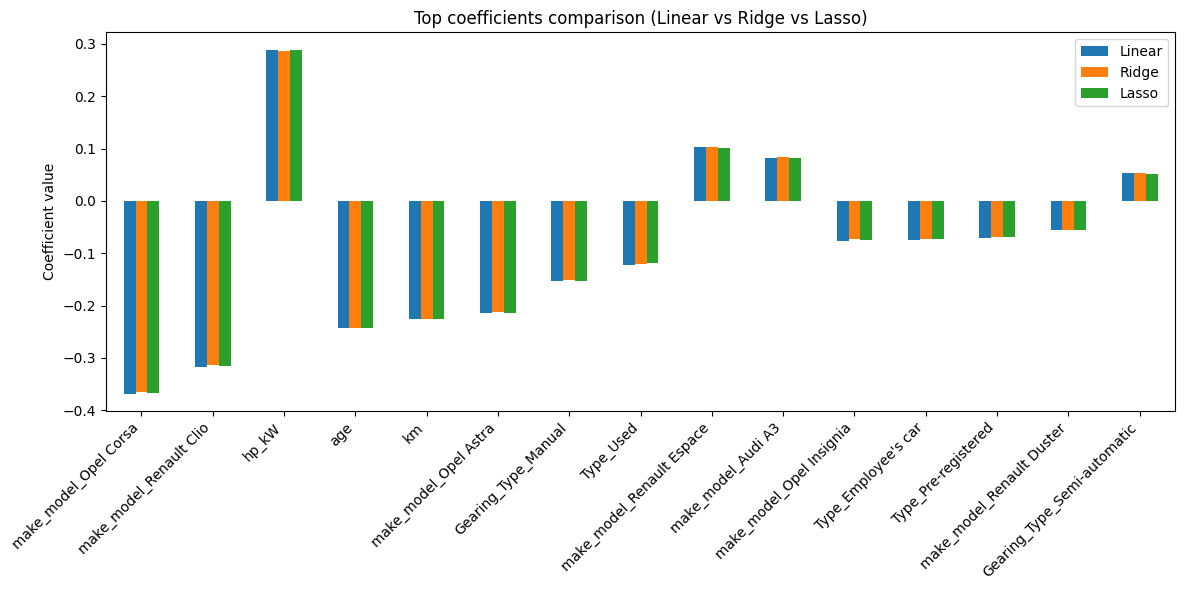

In [82]:

#coeff zero => By Lasso
lasso_zero_features = coef_df[coef_df["Lasso"] == 0].index.tolist()
print("Features eliminated by Lasso:", lasso_zero_features)


top_n = 15  # number of features to plot

# get absolute top n features from any model
top_coef_features = coef_df.abs().sum(axis=1).sort_values(ascending=False).head(top_n).index

coef_df.loc[top_coef_features].plot(kind='bar', figsize=(12, 6))
plt.title("Top coefficients comparison (Linear vs Ridge vs Lasso)")
plt.ylabel("Coefficient value")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()

## **4 Conclusion & Key Takeaways**  <font color =red> [10 marks] </font>

What did you notice by performing regularisation? Did the model performance improve? If not, then why? Did you find overfitting or not? Was the data sufficent? Is a linear model sufficient?

#### **4.1 Conclude with outcomes and insights gained** <font color =red> [10 marks] </font>